# Calculate correlation difference between subcortical volumes and subject age

In this Jupyter notebook, we will be analysing the effect of segmentation difference in a common meta-analysis:
The pipeline will include a plot of histogram.

## Inputs
- *.csv file for volumes extracted from output in different systems
- 'metadata.csv'

## Outputs
- Density plot of correlation difference.

## Notebook Workflow
1. Iterate through each volumes.
2. Calculate the correlation between subcortical volume vs age and their difference among systems. 
3. Generate plot 

In [1]:
!pip install joypy

In [2]:
import pandas as pd
import os, glob
import numpy as np
import nibabel as nb
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats.stats import pearsonr
from scipy.stats import permutation_test
import random
from joypy import joyplot
from pandas.api.types import CategoricalDtype

/tmp/ipykernel_325179/1009761937.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
!unzip './data/volume.zip'

In [3]:
metadata = pd.read_csv(os.path.join(os.path.dirname(os.path.realpath("metadata.csv")), 'data/metadata.csv'))

samples = [10, 30, 50]
volume_list_all = sorted(glob.glob(os.path.join( os.path.dirname(os.path.realpath("metadata.csv")), 'data/volume', '*.csv')))

segs = ['Left-Thalamus-Proper', 'Left-Caudate', 'Left-Putamen', 'Left-Pallidum',
'Left-Hippocampus', 'Left-Amygdala', 'Left-Accumbens-area',
'Right-Thalamus-Proper', 'Right-Caudate', 'Right-Putamen','Right-Pallidum',
'Right-Hippocampus', 'Right-Amygdala', 'Right-Accumbens-area']

sample = []
stat_neuro = []
stat_local = []


for n in samples:
    volume_list = random.choices(volume_list_all, k=n)

    #Neuroodesk 1 system 1 vs 2: Correlation between age and each subcortical volume on left hemisphere, right hemisphere
    for seg in segs:
        age = []
        subcortical = []

        for volume in volume_list:
            subject = os.path.split(volume)[1].split(".")[0]
            
            subj_age = metadata.loc[metadata['Subject'] == subject , 'Age'].values

            age.append(subj_age[0])
            subcortical_vol = pd.read_csv(volume, index_col=0).loc[seg, 'neurodesk1']
            subcortical.append(subcortical_vol)

        data = {'age': age, 'subcortical': subcortical}
        sys = pd.DataFrame(data)

        age2 = []
        subcortical2 = []

        for volume in volume_list:
            subject = os.path.split(volume)[1].split(".")[0]

            subj_age = metadata.loc[metadata['Subject'] == subject , 'Age'].values

            age2.append(subj_age[0])
            subcortical_vol = pd.read_csv(volume, index_col=0).loc[seg, ' neurodesk2']
            subcortical2.append(subcortical_vol)

        data2 = {'age': age2, 'subcortical': subcortical2}
        sys2 = pd.DataFrame(data2)


        def statistic(x, y):
            return pearsonr(x, y)[0]
        stat = permutation_test((sys['age'], sys['subcortical']), statistic, vectorized=False,
                            permutation_type='pairings',
                            random_state=0)

        stat2 = permutation_test((sys2['age'], sys2['subcortical']), statistic, vectorized=False,
                            permutation_type='pairings',
                            random_state=0)        
        stat_neuro.append(stat.statistic - stat2.statistic)     
        sample.append(n)     

    #Neuroodesk 1 system 1 vs 2: Correlation between age and each subcortical volume on both hemispheres
    for id, seg in enumerate(segs[:7]):
        age = []
        subcortical = []

        for volume in volume_list:
            subject = os.path.split(volume)[1].split(".")[0]

            subj_age = metadata.loc[metadata['Subject'] == subject , 'Age'].values

            age.append(subj_age[0])
            subcortical_vol = pd.read_csv(volume, index_col=0).loc[seg, 'neurodesk1'] + pd.read_csv(volume, index_col=0).loc[segs[id+7], 'neurodesk1']
            subcortical.append(subcortical_vol)

        data = {'age': age, 'subcortical': subcortical}
        sys = pd.DataFrame(data)

        age2 = []
        subcortical2 = []

        for volume in volume_list:
            subject = os.path.split(volume)[1].split(".")[0]

            subj_age = metadata.loc[metadata['Subject'] == subject , 'Age'].values

            age2.append(subj_age[0])
            subcortical_vol = pd.read_csv(volume, index_col=0).loc[seg, ' neurodesk2']  + pd.read_csv(volume, index_col=0).loc[segs[id+7], ' neurodesk2']
            subcortical2.append(subcortical_vol)

        data2 = {'age': age2, 'subcortical': subcortical2}
        sys2 = pd.DataFrame(data2)


        def statistic(x, y):
            return pearsonr(x, y)[0]
        stat = permutation_test((sys['age'], sys['subcortical']), statistic, vectorized=False,
                            permutation_type='pairings',
                            random_state=0)

        stat2 = permutation_test((sys2['age'], sys2['subcortical']), statistic, vectorized=False,
                            permutation_type='pairings',
                            random_state=0)        
        stat_neuro.append(stat.statistic - stat2.statistic)  
        sample.append(n)           

    #Local system 1 vs 2: Correlation between age and each subcortical volume on left hemisphere, right hemisphere
    for seg in segs:
        age = []
        subcortical = []

        for volume in volume_list:
            subject = os.path.split(volume)[1].split(".")[0]

            subj_age = metadata.loc[metadata['Subject'] == subject , 'Age'].values

            age.append(subj_age[0])
            subcortical_vol = pd.read_csv(volume, index_col=0).loc[seg, ' local1']
            subcortical.append(subcortical_vol)

        data = {'age': age, 'subcortical': subcortical}
        sys = pd.DataFrame(data)

        age2 = []
        subcortical2 = []

        for volume in volume_list:
            subject = os.path.split(volume)[1].split(".")[0]

            subj_age = metadata.loc[metadata['Subject'] == subject , 'Age'].values

            age2.append(subj_age[0])
            subcortical_vol = pd.read_csv(volume, index_col=0).loc[seg, ' local2']
            subcortical2.append(subcortical_vol)

        data2 = {'age': age2, 'subcortical': subcortical2}
        sys2 = pd.DataFrame(data2)


        def statistic(x, y):
            return pearsonr(x, y)[0]
        stat = permutation_test((sys['age'], sys['subcortical']), statistic, vectorized=False,
                            permutation_type='pairings',
                            random_state=0)

        stat2 = permutation_test((sys2['age'], sys2['subcortical']), statistic, vectorized=False,
                            permutation_type='pairings',
                            random_state=0)        
        stat_local.append(stat.statistic - stat2.statistic)  
          
    #Local system 1 vs 2: Correlation between age and each subcortical volume both hemispheres
    for id, seg in enumerate(segs[:7]):
        age = []
        subcortical = []

        for volume in volume_list:
            subject = os.path.split(volume)[1].split(".")[0]

            subj_age = metadata.loc[metadata['Subject'] == subject , 'Age'].values

            age.append(subj_age[0])
            subcortical_vol = pd.read_csv(volume, index_col=0).loc[seg, ' local1'] + pd.read_csv(volume, index_col=0).loc[segs[id+7], ' local1']
            subcortical.append(subcortical_vol)

        data = {'age': age, 'subcortical': subcortical}
        sys = pd.DataFrame(data)

        age2 = []
        subcortical2 = []

        for volume in volume_list:
            subject = os.path.split(volume)[1].split(".")[0]

            subj_age = metadata.loc[metadata['Subject'] == subject , 'Age'].values

            age2.append(subj_age[0])
            subcortical_vol = pd.read_csv(volume, index_col=0).loc[seg, ' local2']  + pd.read_csv(volume, index_col=0).loc[segs[id+7], ' local2']
            subcortical2.append(subcortical_vol)

        data2 = {'age': age2, 'subcortical': subcortical2}
        sys2 = pd.DataFrame(data2)


        def statistic(x, y):
            return pearsonr(x, y)[0]
        stat = permutation_test((sys['age'], sys['subcortical']), statistic, vectorized=False,
                            permutation_type='pairings',
                            random_state=0)

        stat2 = permutation_test((sys2['age'], sys2['subcortical']), statistic, vectorized=False,
                            permutation_type='pairings',
                            random_state=0)        
        stat_local.append(stat.statistic - stat2.statistic)     


Text(0.5, 51.0, 'Coefficient difference')

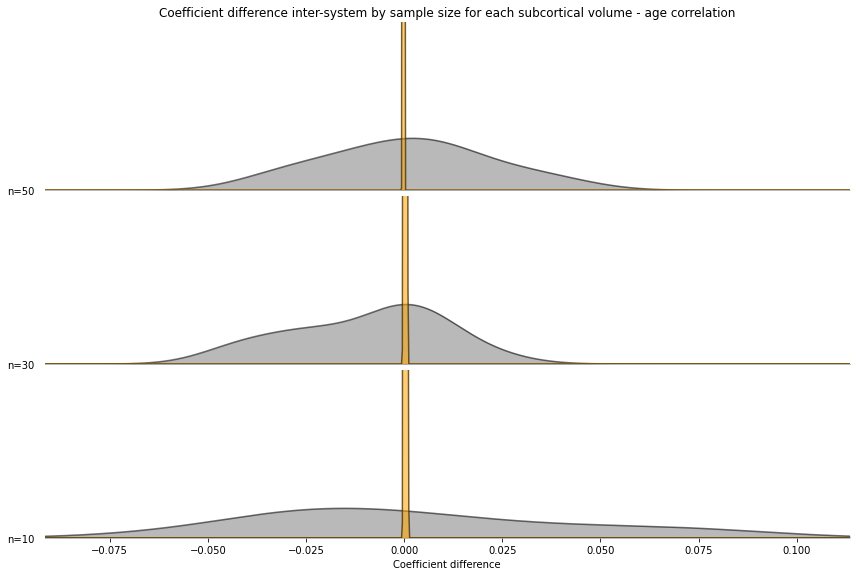

In [4]:
difference = pd.DataFrame({'n': sample, 'neurodesk': stat_neuro, 'local': stat_local})

sample_dict = {10: 'n=10', 30: 'n=30', 50: 'n=50'}
difference['n'] = difference['n'].map(sample_dict)
n_sample = CategoricalDtype(categories=['n=50','n=30','n=10'], ordered=True)
difference['n'] = difference['n'].astype(n_sample)

fig, ax = joyplot(
    data=difference[[ 'local','neurodesk', 'n']], 
    by='n',
    column=[ 'local','neurodesk'],
    color=['grey', 'orange'],
    fill=True,
    alpha=0.55,
    figsize=(12, 8),
    ylim=(0, 55),
    title='Coefficient difference inter-system by sample size for each subcortical volume - age correlation',
    overlap=0
)

plt.ylabel("Sample size")
plt.xlabel("Coefficient difference")